In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt

import keila_wrangle as w

In [2]:
df = w.read_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low


In [3]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low


In [4]:
train, validate, test = w.clean_wine()

In [5]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3551, 15)
validate -> (1184, 15)
test -> (1184, 15)


In [6]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

1. What is the distribution of each of the variables?

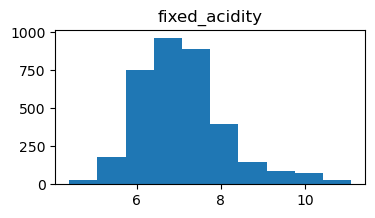

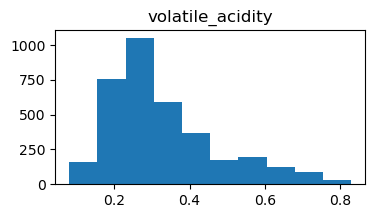

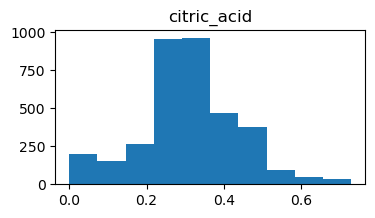

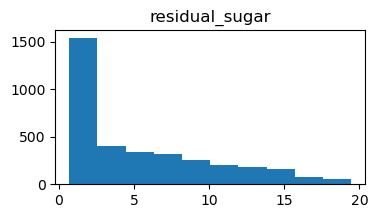

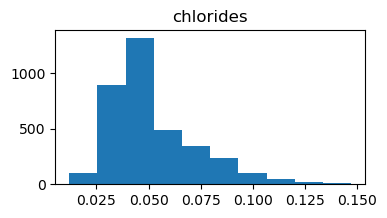

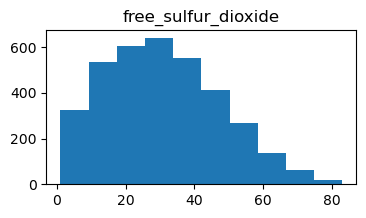

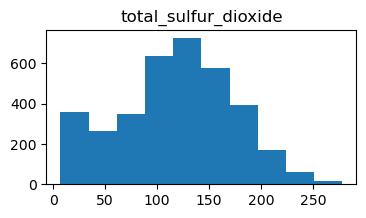

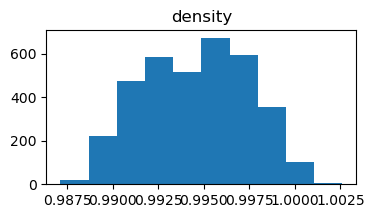

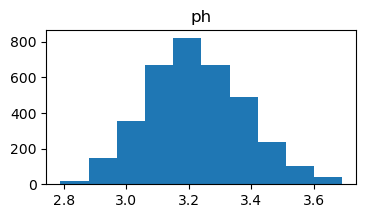

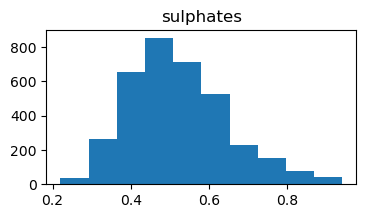

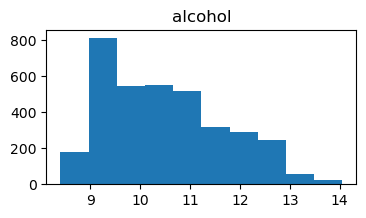

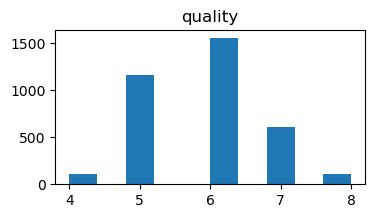

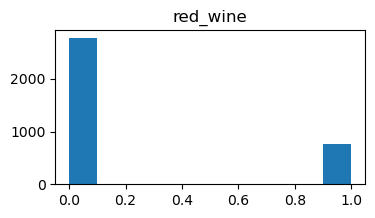

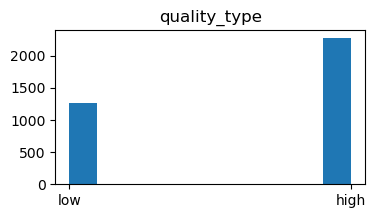

In [7]:
for col in train.drop(columns='wine_type').columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

conclusion:

    * normal dist -- citrc_acid, density, ph, quality
    
    * skews to the right -- red_wine, alcohol, sulphates, total_sulfur_dioxide,  free_sulfur_dioxide, cholrides, residual_sugar, volatile_acidity, fixed_acidity
    
    * The sample has more white wine than red

exploratory Questions:
    
    - Is there a relationship between citric acid and quality?
    - Is there a relationship between density and quality?
    - Is there a relationship between ph and quality?
    
    - residual suger and density 
    

 # Statistical testing 

In [8]:
def corr_test(train, x_col, y_col):
    corr, p = stats.pearsonr(train[x_col], train[y_col])
    if p < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject null hypothesis")
    return corr, p


In [9]:
# confidence level = 95% 
alpha = 0.05

$H_o$: There is no linear correlation between 'fixed_acidity' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'fixed_acidity' and the 'quality' on the wine.

In [10]:
corr_test(train, "fixed_acidity", "quality")

We reject the null hypothesis


(-0.08822036992368139, 1.3981341497492563e-07)

In [11]:
train.fixed_acidity.count() # assume normal

3551

$H_o$: There is no linear correlation between 'volatile_acidity' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'volatile_acidity' and the 'quality' on the wine.

In [12]:
corr_test(train, "quality", "volatile_acidity")

We reject the null hypothesis


(-0.25436440766232093, 1.4826931662479373e-53)

$H_o$: There is no linear correlation between 'citric_acid' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'citric_acid' and the 'quality' on the wine.

In [13]:
corr_test(train, "quality", "citric_acid")

We reject the null hypothesis


(0.09442975870663803, 1.7232194389794726e-08)

$H_o$: There is no linear correlation between 'residual_sugar' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'residual_sugar' and the 'quality' on the wine.

In [14]:
corr_test(train, "quality", "residual_sugar")

We reject the null hypothesis


(-0.039262784204291225, 0.01929622637778901)

$H_o$: There is no linear correlation between 'chlorides' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'chlorides' and the 'quality' on the wine.

In [15]:
corr_test(train, "quality", "chlorides")

We reject the null hypothesis


(-0.255740989628014, 3.88972143863729e-54)

$H_o$: There is no linear correlation between 'free_sulfur_dioxide' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'free_sulfur_dioxide' and the 'quality' on the wine.

In [16]:
corr_test(train, "quality", "free_sulfur_dioxide")

We reject the null hypothesis


(0.07177163820187438, 1.8613337386911702e-05)

$H_o$: There is no linear correlation between 'total_sulfur_dioxide' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'total_sulfur_dioxide' and the 'quality' on the wine.

In [17]:
corr_test(train, "quality", "total_sulfur_dioxide")

We reject the null hypothesis


(-0.04851320268799618, 0.003832861981018334)

$H_o$: There is no linear correlation between 'density' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'density' and the 'quality' on the wine.

In [18]:
corr_test(train, "quality", "density")

We reject the null hypothesis


(-0.32533615329159615, 2.4930044640584615e-88)

$H_o$: There is no linear correlation between 'ph' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'ph' and the 'quality' on the wine.

In [19]:
corr_test(train, "quality", "ph")

We fail to reject null hypothesis


(0.0191897097661445, 0.2529461804358926)

$H_o$: There is no linear correlation between 'sulphates' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'sulphates' and the 'quality' on the wine.

In [20]:
corr_test(train, "quality", "sulphates")

We reject the null hypothesis


(0.05011381191862115, 0.0028161827425560917)

$H_o$: There is no linear correlation between 'alcohol' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'alcohol' and the 'quality' on the wine.

In [21]:
corr_test(train, "quality", "alcohol")

We reject the null hypothesis


(0.46815600128849943, 6.273115230952022e-193)

$H_o$: There is no linear correlation between 'wine_type' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'wine_type' and the 'quality' on the wine.

In [22]:
corr_test(train, "quality", "red_wine")

We reject the null hypothesis


(-0.11924404926946276, 1.012987124737191e-12)

train.columns

In [23]:
def ind_test(samp1, samp2, alpha=0.05):
    '''
    Completes an sample t-test, based on the null hypothesis less than
    '''
    t, p = stats.ttest_ind(samp1, samp2, equal_var=False)

    if p/2 < alpha and t > 0 :
        print(f'''Reject the null hypothesis: Sufficient''')
    else:
        print(f''' Fail to reject the null: Insufficient evidence''')
    print(f" p-value: {p} , t: {t}")



In [24]:
# Does low quality wine have more residual suger or less when compared to high quality wine?

$H_o$: Mean of 'residual_sugar' for low quality wines <= Mean of 'residual_sugar' for high quality wines

$H_a$: Mean of 'residual_sugar' for low quality wines > Mean of 'residual_sugar' for high quality wines

In [25]:
low_quality = train[train.quality_type == 'low'].residual_sugar

high_quality = train[train.quality_type == 'high'].residual_sugar

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


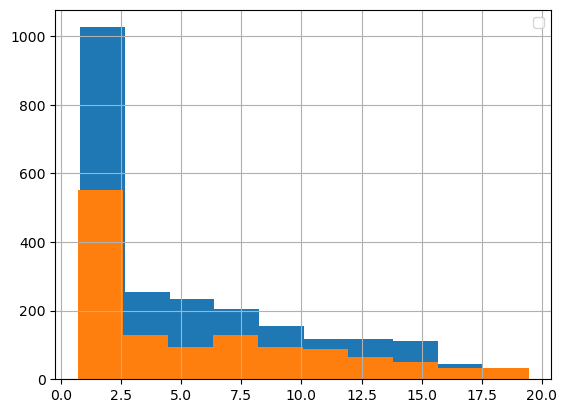

In [26]:
high_quality.hist()
low_quality.hist()
plt.legend()

In [27]:
def sugar_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Low Quality Wine has More Sugar")
    sns.barplot(x="quality_type", y="residual_sugar", data=df, hue='wine_type')
    plt.xlabel("Quality")
    plt.ylabel("Amount of Sugar")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.residual_sugar.mean()
    plt.axhline(property_value_average, label="Residual Sugar Average", color='DarkSlateBlue')
    plt.legend(loc='upper right')
    plt.show()

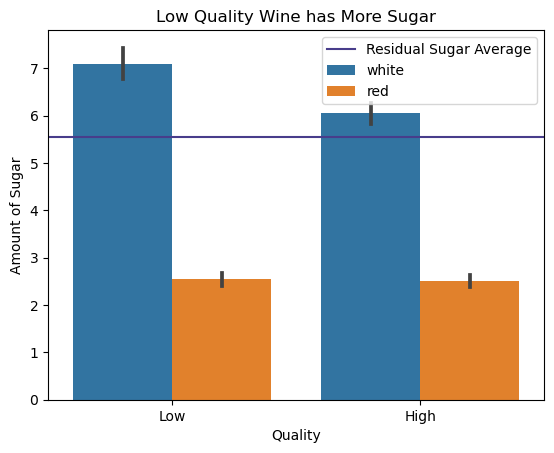

In [28]:
sugar_barplot(train)

In [29]:
low_quality.var(), high_quality.var()

(23.96522499956499, 20.619943637586797)

In [30]:
ind_test(low_quality, high_quality)

Reject the null hypothesis: Sufficient
 p-value: 0.015019749218448116 , t: 2.433613307341986


$H_o$: Mean of 'density' for low quality wines <= Mean of 'residual_sugar' for high quality wines

$H_a$: Mean of 'density' for low quality wines > Mean of 'residual_sugar' for high quality wines

In [31]:
red = train[train['wine_type'] == "red"]
white = train[train['wine_type'] == "white"]

$H_o$: wine type is independent of quality type

$H_a$: wine type is dependent of quality type

In [32]:
observed = pd.crosstab(train.wine_type, train.quality_type)

In [33]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p


2.3495044521689558e-12

In [34]:
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < alpha:
        print(f'There exists some relationship between {group1} and the {group2}. (p-value: {p})')
    else:
        print(f'There is not a significant relationship between {group1} and {group2}. (p-value: {p})')

In [35]:
eval_results(p, alpha, train.wine_type, train.quality_type)

There exists some relationship between 1961    white
3624    white
216     white
657     white
1571    white
        ...  
1125    white
994     white
3813    white
4429    white
3234    white
Name: wine_type, Length: 3551, dtype: object and the 1961     low
3624    high
216      low
657      low
1571    high
        ... 
1125    high
994     high
3813     low
4429    high
3234    high
Name: quality_type, Length: 3551, dtype: object. (p-value: 2.3495044521689558e-12)


In [36]:

def train_heat(train):
    '''
    Creates a heatmap of the variables within the zillow dataset
    '''

    # Increase the figure size to accommodate the heatmap
    plt.figure(figsize=(10, 8))
    # Correlation heat map
    sns.heatmap(train.corr(method='pearson'), cmap='YlGnBu', annot=True, fmt=".2f",
                mask=np.triu(train.corr(method='pearson')))
    # Adjust the font size of the annotations
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    # Show the plot
    
    plt.show()

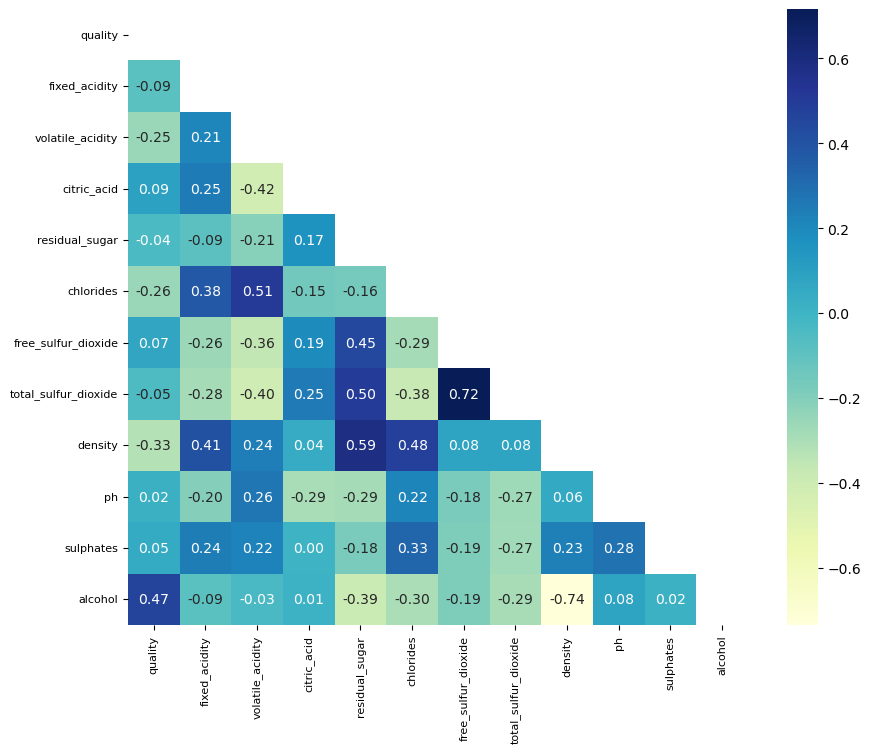

In [37]:
train_heat(train[['quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol']])

In [ ]:
# correlation between train.total_sulfur_dioxide, train.chlorides
corr2, p2 = stats.pearsonr(train.total_sulfur_dioxide, train.chlorides)

In [38]:
def tsd_chlorides_relplot(df):
    '''
    Creates a relplot for input variables within the given dataset
    '''
    sns.set(style="white")
    # Create scatter plot
    sns.set_palette("pastel")
    ax = sns.relplot(x="chlorides", y="total_sulfur_dioxide", data=df, hue="quality_type")

    # Add regression line
    sns.regplot(x="chlorides", y="total_sulfur_dioxide", data=df, scatter=False, color='DarkSlateBlue')
    # ax.fig.suptitle(title, fontsize=10)
    plt.xlabel("Chlorides")
    plt.title("Relationship Chlorides and Total Sulfur Dioxide")
    plt.ylabel("Total Sulfur Dioxide")
    plt.show()

# citric acid in red win

In [39]:
def citric_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Higher Quality Wine has More Citric Acid ")
    sns.barplot(x="quality_type", y="citric_acid", data=df, hue="red_wine")
    plt.xlabel("Quality")
    plt.ylabel("Amount of Citric Acid")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.citric_acid.mean()
    plt.axhline(property_value_average, label="citric_acid", color='DarkSlateBlue')
    plt.legend()
    plt.show()

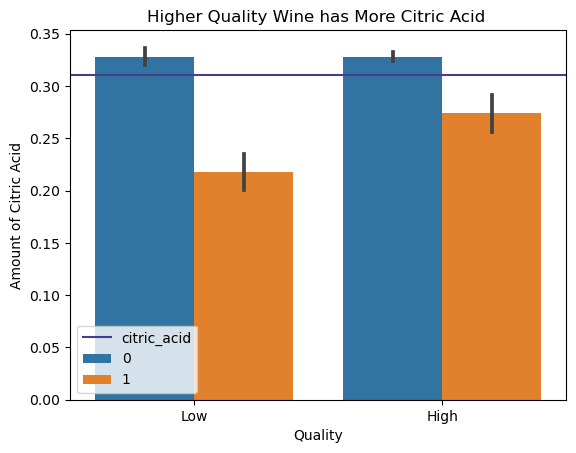

In [40]:
citric_barplot(train)

observation:
    * red wine with more citric acid is higher quality
    * white wine doesn't differ much in quality and has more red wine 
    
null h: That high quality red wine is less than or equal to citric acid  compared to low quality red wine
     That high quality red wine has greater than to citric acid  compared to low quality red wine

In [42]:
# create subset for red wine with high vs low quality
red_high_subset = train[train.red_wine == 1]
red_low_subset = train[train.red_wine == 1]
red_high_subset = red_high_subset[red_high_subset.quality_type == "high"].citric_acid
red_low_subset = red_low_subset[red_low_subset.quality_type == "low"].citric_acid

stats.levene(red_high_subset, red_low_subset)

LeveneResult(statistic=8.051403669742955, pvalue=0.004667153544702737)

In [43]:
e.ind_var_test(red_high_subset, red_low_subset)

NameError: name 'e' is not defined

In [57]:
# create column that lst red wine with high citric acid
red_wine_mean_citric_acid = train[train.red_wine == 1].citric_acid.mean()
train['high_citric'] = (train.red_wine == 1) & (train.citric_acid > red_wine_mean_citric_acid)
train['high_citric'] = train['high_citric'].astype(int)

In [39]:
def citric_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Higher Quality Wine has More Citric Acid ")
    sns.barplot(x="quality_type", y="citric_acid", data=df, hue="red_wine")
    plt.xlabel("Quality")
    plt.ylabel("Amount of Citric Acid")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.citric_acid.mean()
    plt.axhline(property_value_average, label="citric_acid", color='DarkSlateBlue')
    plt.legend()
    plt.show()

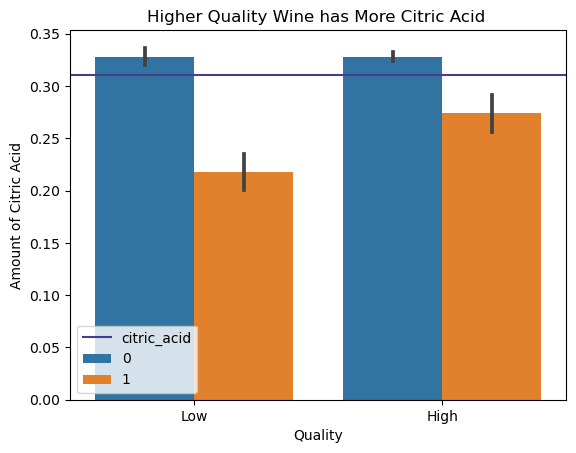

In [40]:
citric_barplot(train)

observation:
    * red wine with more citric acid is higher quality
    * white wine doesn't differ much in quality and has more red wine 
    
null h: That high quality red wine is less than or equal to citric acid  compared to low quality red wine
     That high quality red wine has greater than to citric acid  compared to low quality red wine

In [42]:
# create subset for red wine with high vs low quality
red_high_subset = train[train.red_wine == 1]
red_low_subset = train[train.red_wine == 1]
red_high_subset = red_high_subset[red_high_subset.quality_type == "high"].citric_acid
red_low_subset = red_low_subset[red_low_subset.quality_type == "low"].citric_acid

stats.levene(red_high_subset, red_low_subset)

LeveneResult(statistic=8.051403669742955, pvalue=0.004667153544702737)

In [43]:
e.ind_var_test(red_high_subset, red_low_subset)

NameError: name 'e' is not defined

In [44]:
# create column that lst red wine with high citric acid
red_wine_mean_citric_acid = train[train.red_wine == 1].citric_acid.mean()
train['high_citric'] = (train.red_wine == 1) & (train.citric_acid > red_wine_mean_citric_acid)
train['high_citric'] = train['high_citric'].astype(int)

# Does low quality wine have more volatile acidity or less when compared to high quality wine?

$H_o$: Mean of 'volatile_acidity' for low quality wines <= Mean of 'volatile_acidity' for high quality wines

$H_a$: Mean of 'volatile_acidity' for low quality wines > Mean of 'volatile_acidity' for high quality wines

In [48]:
def volatile_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Low Quality Wine has More volatile_acidity")
    sns.barplot(x="quality_type", y="volatile_acidity", data=df, hue='wine_type')
    plt.xlabel("Quality")
    plt.ylabel("Amount of Volatile Acidity")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.volatile_acidity.mean()
    plt.axhline(property_value_average, label="Volatile Acidity Average", color='DarkSlateBlue')
    plt.legend(loc='upper right')
    plt.show()

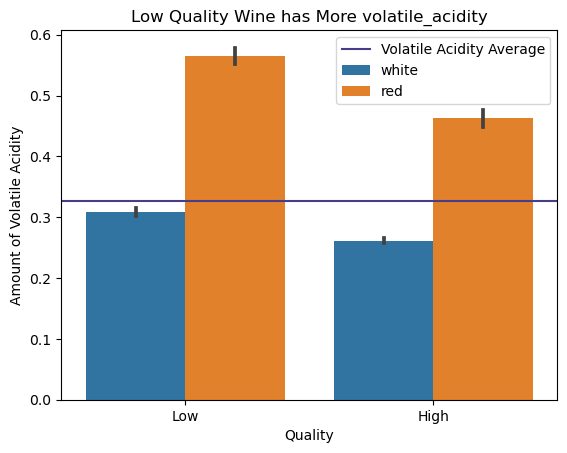

In [51]:
volatile_barplot(train)

observation:
    * high quality wine has less volatile acidity    

In [ ]:
volatile_low_quality = train[train.quality_type == 'low'].volatile_acidity

volatile_high_quality = train[train.quality_type == 'high'].volatile_acidity

In [53]:
stats.levene(volatile_low_quality, volatile_high_quality)

LeveneResult(statistic=104.77562443473862, pvalue=2.9627101513233664e-24)

In [56]:
import keila_explore as e
e.ind_var_test(volatile_low_quality, volatile_high_quality)

Reject the null hypothesis: Sufficient
 p-value: 8.172040139271046e-61 , t: 16.77148917796174


**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of volatile acidity in low quality wine is greater than the average amount of volatile acidity in high quality wine. Based on this, I believe that using the 'volatile_acidity' feature in modeling will have a small positive impact on the model's accuracy.**

In [58]:
def high_citric_col(train, validate, test):
    red_wine_mean_citric_acid = train[train.red_wine == 1].citric_acid.mean()
    # add to train
    train['high_citric'] = (train.red_wine == 1) & (train.citric_acid > red_wine_mean_citric_acid)
    train['high_citric'] = train['high_citric'].astype(int)
    # add validate
    validate['high_citric'] = (validate.red_wine == 1) & (validate.citric_acid > red_wine_mean_citric_acid)
    validate['high_citric'] = validate['high_citric'].astype(int)
    # add test
    test['high_citric'] = (test.red_wine == 1) & (test.citric_acid > red_wine_mean_citric_acid)
    test['high_citric'] = test['high_citric'].astype(int)

In [59]:
high_citric_col(train, validate, test)

In [62]:
validate

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type,quality_type,high_citric
398,5.9,0.26,0.27,18.2,0.048,52.0,168.0,0.99930,3.35,0.44,9.4,5,0,white,low,0
4089,6.8,0.27,0.24,4.6,0.098,36.0,127.0,0.99412,3.15,0.49,9.6,6,0,white,high,0
3051,7.5,0.33,0.38,8.7,0.126,49.0,199.0,0.99711,2.98,0.57,9.4,5,0,white,low,0
4250,6.7,0.11,0.26,14.8,0.053,44.0,95.0,0.99676,3.20,0.35,9.8,6,0,white,high,0
309,7.4,0.29,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6,1,red,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,6.7,0.24,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,6,0,white,high,0
3352,6.7,0.36,0.28,8.3,0.034,29.0,81.0,0.99151,2.96,0.39,12.5,6,0,white,high,0
1190,7.6,0.21,0.44,1.9,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,6,0,white,high,0
2701,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,0,white,low,0


## Does Citric Acid Affect Wine Quality?

$H_o$: The average citric acid in high quality wine is less than or equal to the average citric acid in low quality wine

$H_a$: The average citric acid in high quality wine is greater than the average citric acid in low quality wine

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less citric acid**

* I will use a confidence interval of 95%
* The alpha is .05

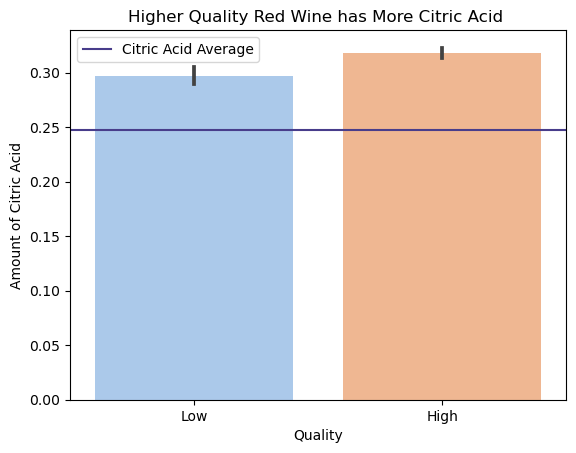

In [14]:
e.citric_barplot(train)

observation:

    * High quality red wine has more citric acid than low quality red wine
    * White wine doesn't differ much in quality when comparing citric acid

In [21]:
# create samples
citric_high_quality = train[train.quality_type == 'high'].citric_acid
citric_low_quality = train[train.quality_type == 'low'].citric_acid
# check variances -- equal
stats.levene(citric_low_quality, citric_high_quality)
# run T-Test
e.ind_var_test(citric_high_quality, citric_low_quality)

Reject the null hypothesis: Sufficient
 p-value: 3.3759193973112407e-06 , t: 4.6539178683730915


**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of citric acid in high quality wine is greater than the average amount of low quality wine. Based on this, I believe that using 'high_citric_acid' feature in modeling will have a small positive impact on the model's accuracy.**

In [ ]:
# which wine type has 